In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import json 
import os
import glob

In [2]:
def savefigDF(ax, file_name):
    fig = ax.get_figure()
    fig.savefig(f'{file_name}.pdf', bbox_inches='tight')
    fig.savefig(f'{file_name}.svg', bbox_inches='tight')

In [19]:
def plotLossColumns(directory):
    results = list()
    for path in glob.glob(directory):
        future_days = path[-7:-5]
        if future_days[0] == '_':
            future_days = int(future_days[1])
        else:
            future_days = int(future_days)
            if future_days not in [12, 24, 36, 48, 60]:
                continue
        with open(path) as json_file:
            data = json.load(json_file)
            results.append([future_days, data['mae'], data['rmse'], data['mape']])
    results.sort(key=lambda x: x[0])
    results = pd.DataFrame(results, columns = ['Number of future time steps', 'MAE', 'RMSE', 'MAPE'])
    ax = results.plot(x="Number of future time steps", y=["MAE", "RMSE", "MAPE"], kind="bar", rot=0,
                     ylabel = 'loss')
    return ax

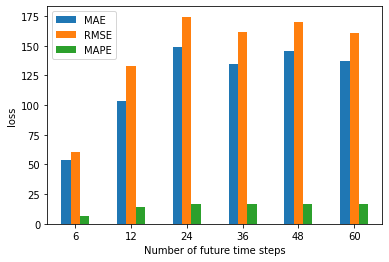

In [20]:
axVAR = plotLossColumns("../Results/VAR/*metrics*.json")
folder_save = f'..\Pics\VAR'
isExist = os.path.exists(folder_save)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(folder_save)
   print("The new directory is created!")
savefigDF(axVAR, f'{folder_save}\loss_compared_num_futures_2')

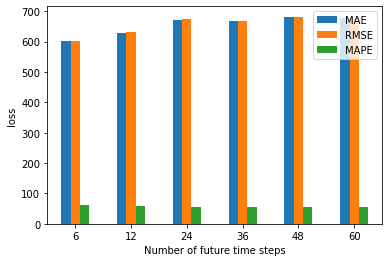

In [21]:
axFbProphet = plotLossColumns("../Results/FbProphet/*metrics_test*.json")
folder_save = f'..\Pics\FbProphet'
isExist = os.path.exists(folder_save)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(folder_save)
   print("The new directory is created!")
savefigDF(axFbProphet, f'{folder_save}\loss_compared_num_futures_2')

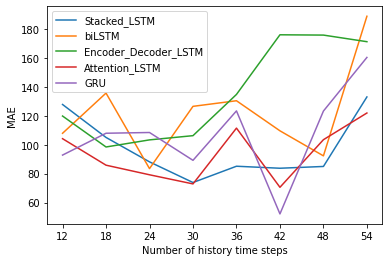

In [3]:
def plotLSTMline(typeLSTMs, loss_type):
    # typeLSTMs = ['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU']
    df = dict()
    range_days = [*range(12, 60, 6)]
    for typeLSTM in typeLSTMs:
        df[typeLSTM] = list()
        for num_future_day in range_days:
            with open(f"../Results/{typeLSTM}/history_{num_future_day}_future_24_version_1/metrics_test.json"
                     ) as json_file:
                data = json.load(json_file)
            df[typeLSTM].append(data[loss_type])
    df = pd.DataFrame(df, index = range_days)
    ax = df.plot.line(xlabel = 'Number of history time steps', ylabel = loss_type.upper())
    ax.set_xticks(range_days)
    ax.legend(loc=2)
    return ax
ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'mae')

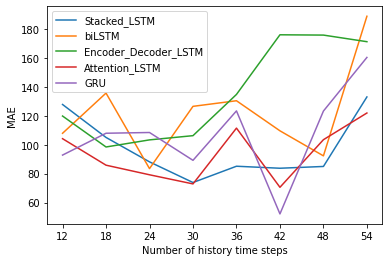

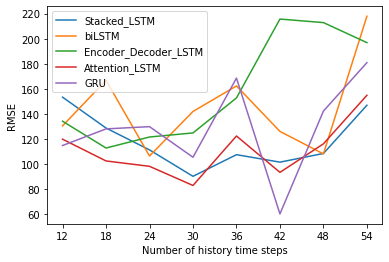

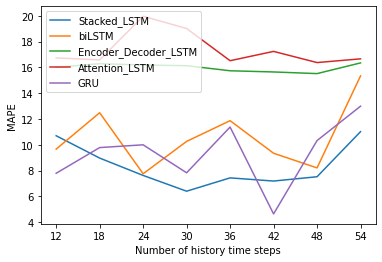

In [4]:
folder_save = f'..\Pics\Deep_Learning'
ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'mae')
savefigDF(ax, f'{folder_save}\different_past_mae')
ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'rmse')
savefigDF(ax, f'{folder_save}\different_past_rmse')
ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'mape')
savefigDF(ax, f'{folder_save}\different_past_mape')

<AxesSubplot: xlabel='Number of days in past', ylabel='loss'>

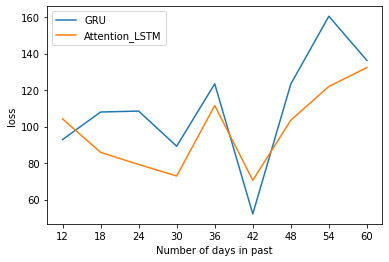

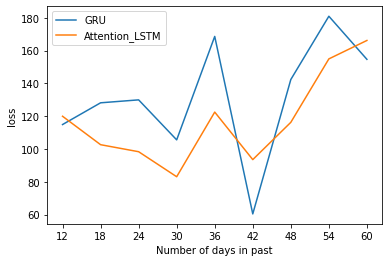

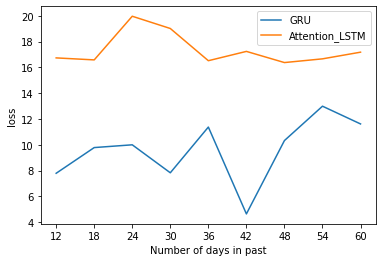

In [4]:
models = ['GRU', 'Attention_LSTM']
plotLSTMline(models, 'mae')
plotLSTMline(models, 'rmse')
plotLSTMline(models, 'mape')

In [25]:
def plotClipping():
    results = list()
    for i in [*range(500, 790, 50)]:
        with open(f'../Results/GRU_clip/history_42_future_24_version_{i}/metrics_test.json') as json_file:
            data = json.load(json_file)
            results.append([str(i), data['mae'], data['rmse'], data['mape']])
    with open(f'../Results/GRU/history_42_future_24_version_1/metrics_test.json') as json_file:
        data = json.load(json_file)
        results.append(['no clipping', data['mae'], data['rmse'], data['mape']])
    results = pd.DataFrame(results, columns = ['Lowerbound clipping', 'mae', 'rmse', 'mape'])
    ax = results.plot(x="Lowerbound clipping", y=["mae", "rmse", "mape"], kind="bar", rot=0,
                     ylabel = 'loss')
    return ax

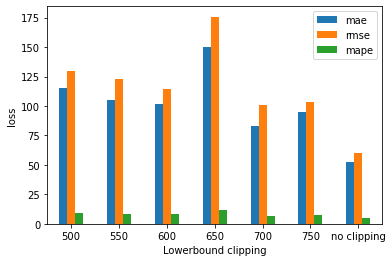

In [26]:
ax = plotClipping()
savefigDF(ax, f'..\Pics\Deep_Learning\Clipping_result')

{'GRU MAE': [149.62360771484376, 142.1637606282552, 153.42703368055558, 52.136028894042965, 108.40791959092884, 68.36273616739908, 98.08518177083332], 'Attention_LSTM MAE': [93.88058697916667, 68.63774011230468, 86.53059964192705, 72.90000418701169, 64.03726597764755, 83.60223275960286, 84.22675724121092], 'VAR MAE': [53.84650131112098, 103.69701037275149, 155.08280311258815, 148.84552003401427, 134.46324807885782, 146.0158426059651, 137.17714231420317], 'GRU MAPE': [15.582077572841888, 14.240780551602244, 13.305713463507704, 4.635880042771863, 9.629847739024378, 5.937664404155099, 8.731290145902008], 'Attention_LSTM MAPE': [8.011357115464696, 18.1723491203195, 19.57756215294408, 19.017734114348244, 18.019249342063773, 15.768333263205012, 18.590930880655165], 'VAR MAPE': [6.387186124579262, 14.253021302686077, 18.373602834285816, 16.90904625889776, 16.454650988317347, 16.631146418322807, 16.709550124679694]}


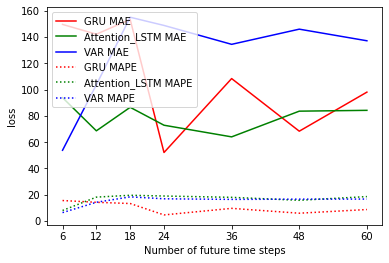

In [7]:
def plotLSTMfuture(typeLSTMs, loss_types):
    # typeLSTMs = ['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU']
    df = dict()
    range_days = [6, 12, 18, 24, 36, 48, 60]
    for loss_type in loss_types:
        for typeLSTM in typeLSTMs:
            df[f'{typeLSTM} {loss_type.upper()}'] = list()
            for num_future_day in range_days:
                if typeLSTM == 'GRU':
                    with open(f"../Results/{typeLSTM}/history_42_future_{num_future_day}_version_1/metrics_test.json"
                             ) as json_file:
                        data = json.load(json_file)
                    df[f'{typeLSTM} {loss_type.upper()}'].append(data[loss_type])
                else:
                    with open(f"../Results/{typeLSTM}/history_30_future_{num_future_day}_version_1/metrics_test.json"
                             ) as json_file:
                        data = json.load(json_file)
                    df[f'{typeLSTM} {loss_type.upper()}'].append(data[loss_type])

        df[f'VAR {loss_type.upper()}'] = list()
        for num_future_day in range_days:
            with open(f"../Results/VAR/metrics_test_{num_future_day}.json") as json_file:
                data = json.load(json_file)
            df[f'VAR {loss_type.upper()}'].append(data[loss_type])
    print(df)
    df = pd.DataFrame(df, index = range_days)
    ax = df.plot.line(xlabel = 'Number of future time steps', ylabel = loss_type.upper(), 
                      color = ['r', 'g', 'b', 'r', 'g', 'b'], style = ['-', '-', '-', ':', ':', ':'])
    ax.set_xticks(range_days)
    ax.legend(loc=2)
    ax.set_ylabel('loss')
    return ax
ax = plotLSTMfuture(['GRU', 'Attention_LSTM'], ['mae', 'mape'])

In [8]:
savefigDF(ax, f'{folder_save}\different_future')

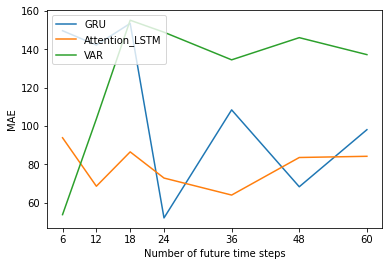

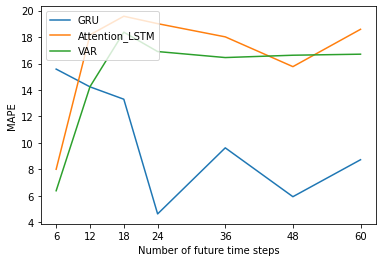

In [38]:
folder_save = f'..\Pics\Deep_Learning'
ax = plotLSTMfuture(['GRU', 'Attention_LSTM'], 'mae')
savefigDF(ax, f'{folder_save}\different_future_mae')
ax = plotLSTMfuture(['GRU', 'Attention_LSTM'], 'mape')
savefigDF(ax, f'{folder_save}\different_future_mape')

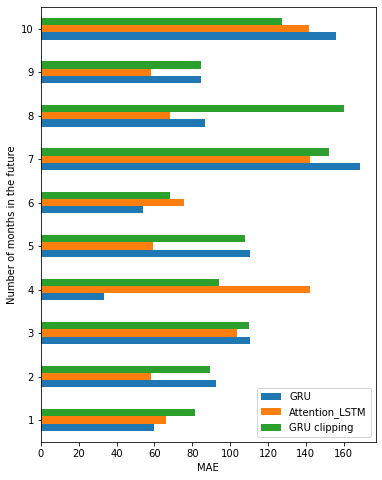

In [13]:
from matplotlib.pyplot import figure
def plotLossColumns(LSTMs):
    results = list()
    for i in [*range(2, 12)]:
        templist = [i - 1]
        for LSTM in LSTMs:
            with open(f'../Results/{LSTM}/{i}/metrics_test.json') as json_file:
                data = json.load(json_file)
                templist.append(data['mae'])

        with open(f'../Results/GRU_clip/{i}/metrics_test.json') as json_file:
            data = json.load(json_file)
            templist.append(data['mae'])
        results.append(templist)
    results = pd.DataFrame(results, columns = ['Number of months in the future', 'GRU', 'Attention_LSTM', 'GRU clipping'])
    ax = results.plot(x="Number of months in the future", y=['GRU', 'Attention_LSTM', 'GRU clipping'], kind="barh", rot=0,
                     ylabel = 'loss', figsize = (6, 8))
    ax.set_xlabel('MAE')
    return ax

ax = plotLossColumns(['GRU', 'Attention_LSTM'])
savefigDF(ax, f'..\Pics\Deep_Learning\endurance')

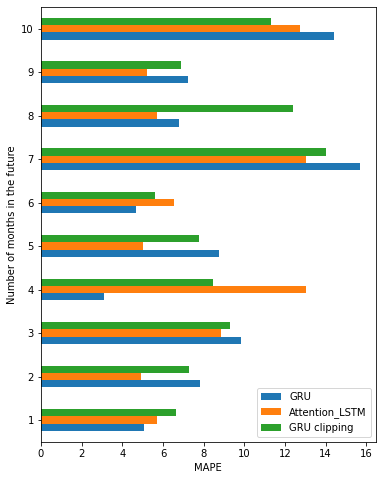

In [12]:
from matplotlib.pyplot import figure
def plotLossColumns(LSTMs):
    results = list()
    for i in [*range(2, 12)]:
        templist = [i - 1]
        for LSTM in LSTMs:
            with open(f'../Results/{LSTM}/{i}/metrics_test.json') as json_file:
                data = json.load(json_file)
                templist.append(data['mape'])

        with open(f'../Results/GRU_clip/{i}/metrics_test.json') as json_file:
            data = json.load(json_file)
            templist.append(data['mape'])
        results.append(templist)
    results = pd.DataFrame(results, columns = ['Number of months in the future', 'GRU', 'Attention_LSTM', 'GRU clipping'])
    ax = results.plot(x="Number of months in the future", y=['GRU', 'Attention_LSTM', 'GRU clipping'], kind="barh", rot=0,
                     ylabel = 'loss', figsize = (6, 8))
    ax.set_xlabel('MAPE')
    return ax

ax = plotLossColumns(['GRU', 'Attention_LSTM'])
savefigDF(ax, f'..\Pics\Deep_Learning\endurance_MAPE')